<a href="https://colab.research.google.com/github/mafegomez-c/Laboratorio-fisica-moderna/blob/main/Radiactividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

El punto de corte de la función es: 8.784155442720929
Pendiente esperada (debe ser cercana a -2): -2.216
Valor obtenido de A: 6529.956


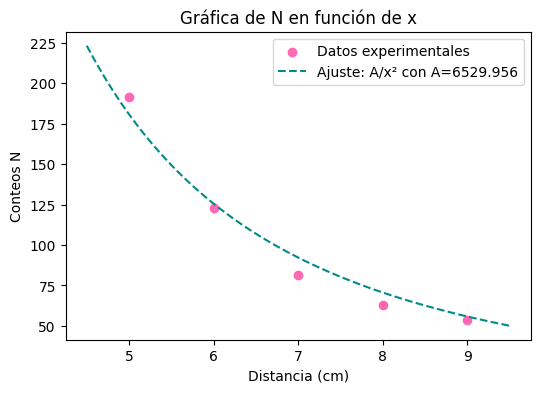

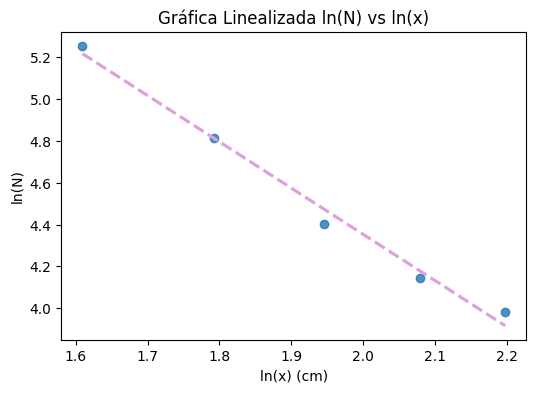

La ecuación del gráfico es y=: -2.216+ 8.784155442720929


In [50]:
#Gráfica 1
x = np.array([5, 6, 7, 8, 9])
N_menos_ambiente = np.array([191.6667, 123, 81.6667, 63, 53.6667])  # Conteos corregidos

ln_x = np.log(x)
ln_N = np.log(N_menos_ambiente)

coefs = np.polyfit(ln_x, ln_N, 1)
pendiente = coefs[0]

ln_A = coefs[1]
A = np.exp(ln_A)
print(f"El punto de corte de la función es: {coefs[1]}")
print(f"Pendiente esperada (debe ser cercana a -2): {pendiente:.3f}")
print(f"Valor obtenido de A: {A:.3f}")


def modelo(x, A):
    return A / x**2

popt, pcov = curve_fit(modelo, x, N_menos_ambiente)
A_fit = popt[0]

x_fit = np.linspace(4.5, 9.5, 100)
y_fit = modelo(x_fit, A_fit)

plt.figure(figsize=(6, 4))
plt.scatter(x, N_menos_ambiente, color='hotpink', label="Datos experimentales")
plt.plot(x_fit, y_fit, color='darkcyan', linestyle="--", label=f"Ajuste: A/x² con A={6529.956}")
plt.xlabel("Distancia (cm)")
plt.ylabel("Conteos N")
plt.title("Gráfica de N en función de x")
plt.legend()

plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(x=ln_x, y=ln_N, scatter=True, line_kws={'color':'plum', 'linestyle':'--'}, ci=None)
plt.xlabel("ln(x) (cm)")
plt.ylabel("ln(N)")
plt.title("Gráfica Linealizada ln(N) vs ln(x)")
plt.show()
print(f"La ecuación del gráfico es y=: {pendiente:.3f}+ {coefs[1]}")

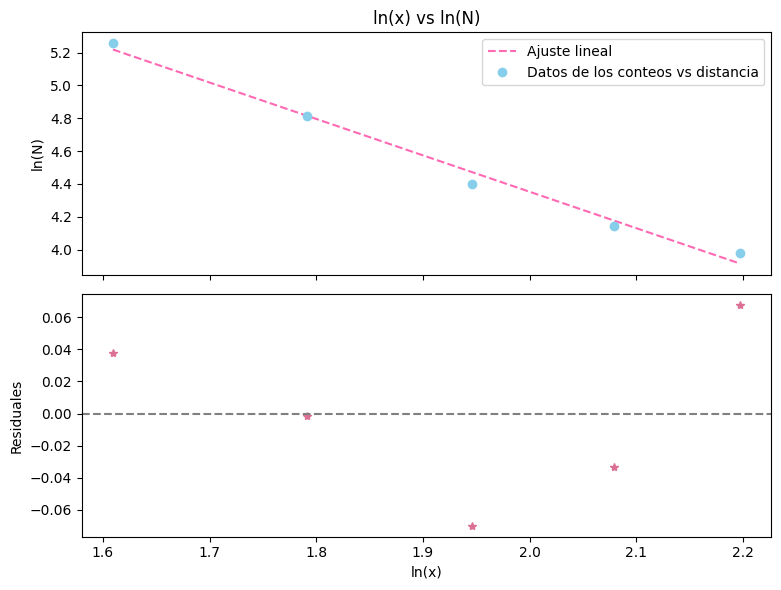

In [46]:
yerr = np.std(ln_N) * np.ones_like(ln_N)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax1.errorbar(ln_x, ln_N, marker="o", linestyle="", label="Datos de los conteos vs distancia", color="skyblue", capsize=3)
ax1.plot(ln_x, B_exp * ln_x + ln_A, linestyle="--", label="Ajuste lineal", color="hotpink")
ax1.set_ylabel("ln(N)")
ax1.set_title("ln(x) vs ln(N)")
ax1.legend()
ax1.grid(False)

# Residuales plot
residuals = ln_N - (B_exp * ln_x + ln_A)
ax2.plot(ln_x, residuals, marker="*", linestyle=" ", color="palevioletred")
ax2.axhline(y=0, color="gray", linestyle="--")
ax2.set_xlabel("ln(x)")
ax2.set_ylabel("Residuales")
ax2.grid(False)

plt.tight_layout()
plt.show()